<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>November 16, 2016: `expt` $g$ poly and $H$ matrix
<br>November 9, 2016: splitting from "big" notebook
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions, with applications to Pascal array $\mathcal{P}$.
</div>

In [62]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, alpha, beta

init_printing()

In [2]:
%run ../../src/matrix_functions.py

# Pascal array $\mathcal{P}$

In [90]:
m=8

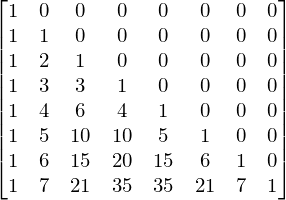

In [91]:
#m = 5 # degree of \Xi minimal polynomial
P = Matrix(m,m,binomial)
P

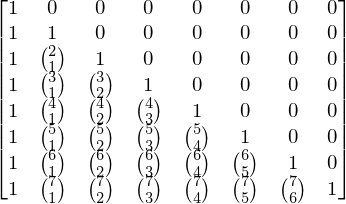

In [5]:
P = Matrix(m,m, lambda n,k: binomial(n, k, evaluate=k >= n or not k))
P

In [92]:
data, eigenvals, multiplicities = eigendata = eigen_data(P)
eigendata

In [93]:
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_poly

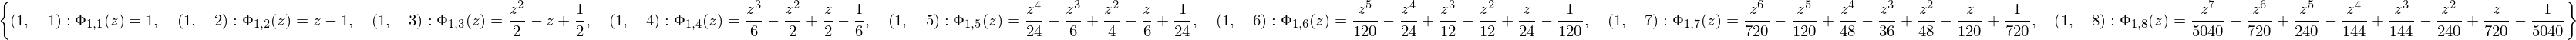

In [94]:
Phi_polynomials = component_polynomials_riordan(m)
Phi_polynomials

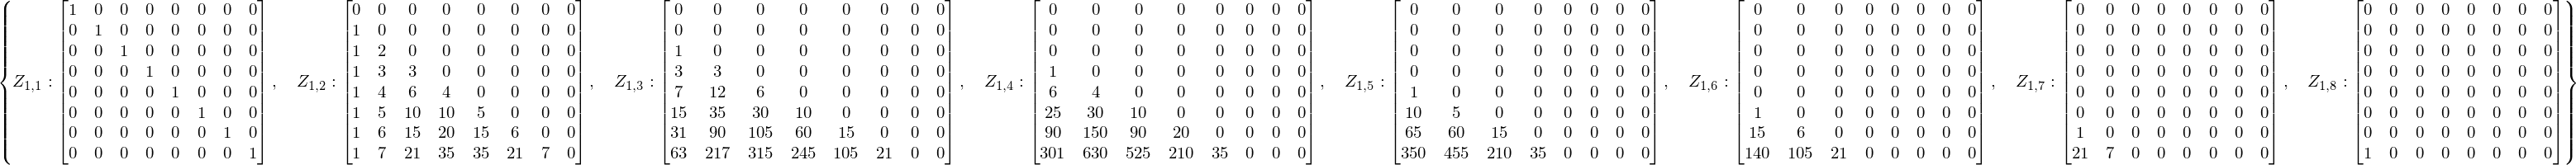

In [10]:
Z = IndexedBase('Z')

cmatrices = component_matrices(P, Phi_polynomials)
{Z[k]:v for k,v in cmatrices.items()}

## `inverse` function

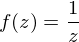

In [11]:
f, h = Function('f'), Function('h')
f_inverse = define(let=f(z), be=1/(z))
f_inverse

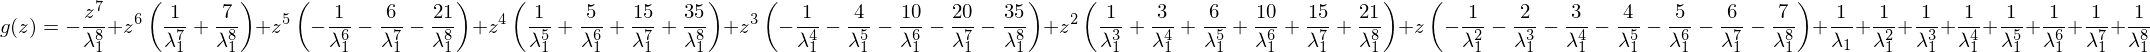

In [12]:
g_inverse = g_poly(f_inverse, eigendata, Phi_polynomials)
g_inverse

In [13]:
g_inverse = g_inverse.subs(eigenvals)
g_inverse

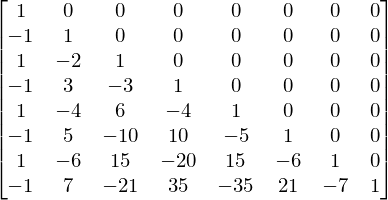

In [14]:
with lift_to_matrix_function(g_inverse) as g_inverse:
    P_inverse = g_inverse(P)
P_inverse

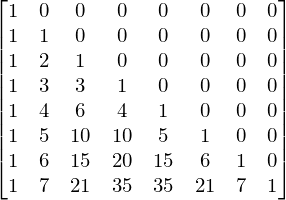

In [15]:
g_inverse(P_inverse)

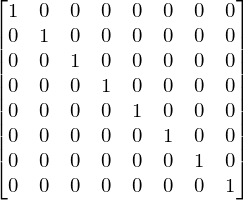

In [16]:
P_inverse * P

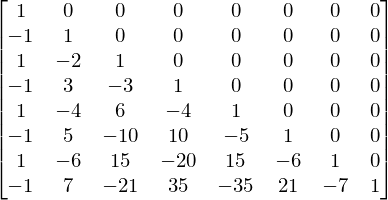

In [17]:
P**(-1)

## `power` function

In [18]:
f = Function('f')
f_power = define(let=f(z), be=z**r)
f_power

In [19]:
g_power = g_poly(f_power, eigendata, Phi_polynomials)
#g_power

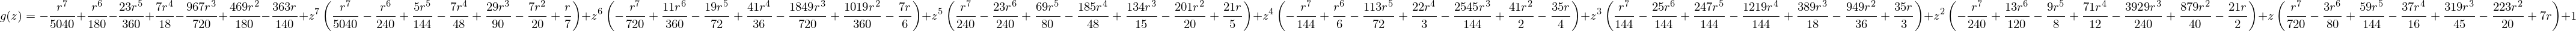

In [20]:
g_power = g_power.subs(eigenvals)
g_power

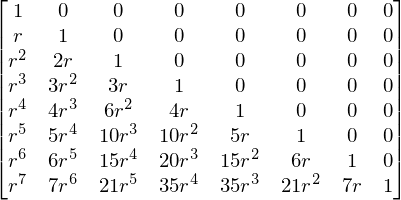

In [21]:
with lift_to_matrix_function(g_power) as g_power:
    m_power = g_power(P)
m_power

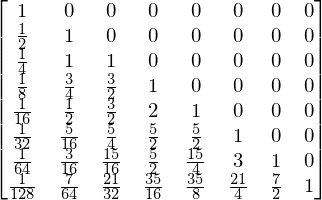

In [24]:
m_power.subs({r:S(1)/2})

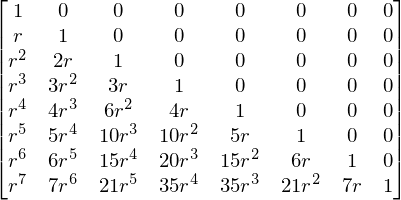

In [25]:
(P**r).applyfunc(simplify)

## `sqrt` function

In [26]:
f = Function('f')
f_sqrt = define(let=f(z), be=sqrt(z))
f_sqrt

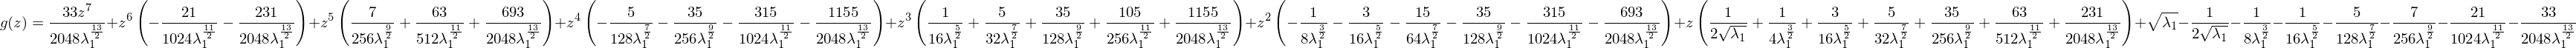

In [27]:
g_sqrt = g_poly(f_sqrt, eigendata, Phi_polynomials)
g_sqrt

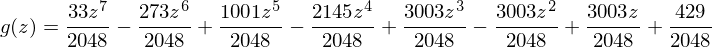

In [28]:
g_sqrt = g_sqrt.subs(eigenvals)
g_sqrt

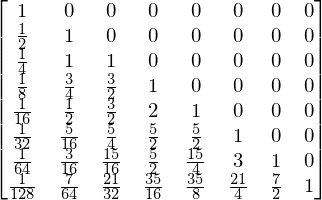

In [29]:
with lift_to_matrix_function(g_sqrt) as g_sqrt:
    m_sqrt = g_sqrt(P)
m_sqrt

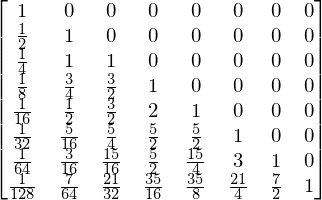

In [30]:
P**(S(1)/2)

## `expt` function

In [95]:
f = Function('f')
f_expt = define(let=f(z), be=exp(alpha*z))
f_expt

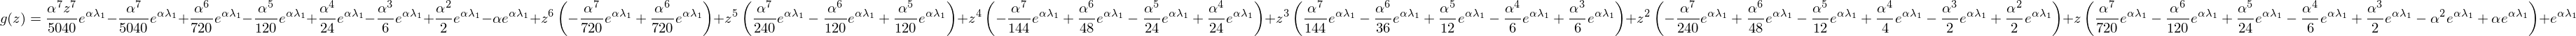

In [96]:
g_expt = g_poly(f_expt, eigendata, Phi_polynomials)
g_expt

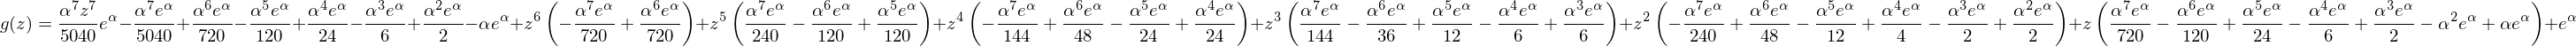

In [97]:
g_expt = g_expt.subs(eigenvals)
g_expt

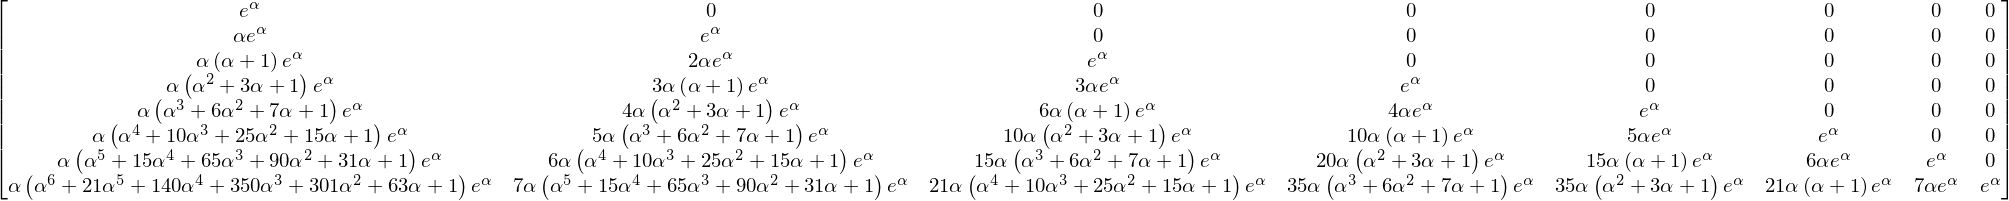

In [98]:
with lift_to_matrix_function(g_expt) as g_expt:
    P_expt = g_expt(P)
P_expt

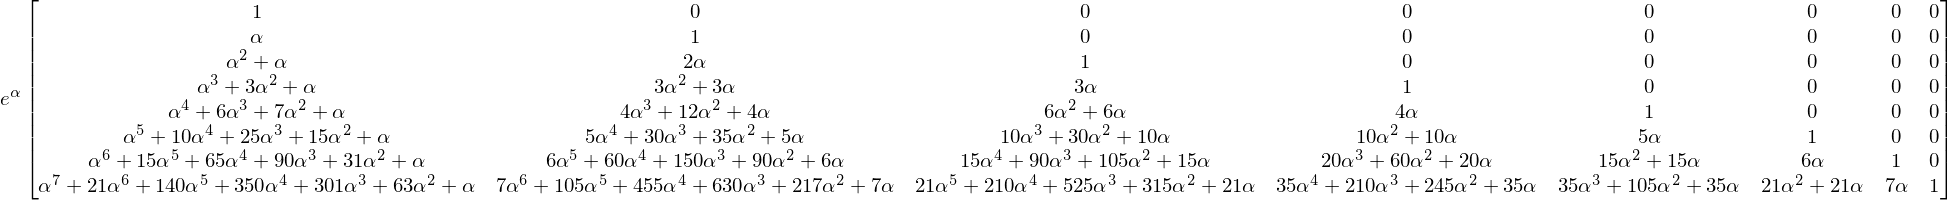

In [99]:
simp_P_expt = Mul(exp(alpha), P_expt.applyfunc(lambda c: (c/exp(alpha)).expand()), evaluate=False)
simp_P_expt

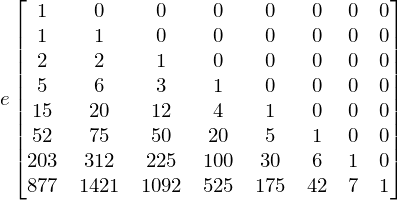

In [100]:
simp_P_expt.subs({alpha:1})

In [101]:
from sympy.functions.combinatorial.numbers import stirling

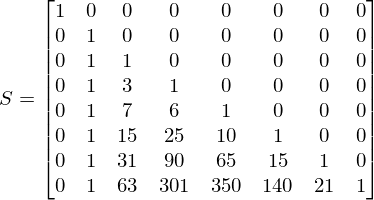

In [102]:
S = Matrix(m, m, lambda n,k: stirling(n,k, kind=2))
Eq(Symbol('S'), S, evaluate=False)

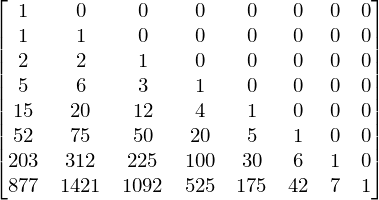

In [103]:
S*P*S**(-1)

### Exercise 5.6

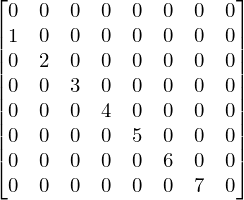

In [48]:
H = Matrix(m, m, lambda n, k: n if n==k+1 else 0)
H

In [76]:
f = Function('f')
f_expt = define(let=f(z), be=exp((alpha + beta)*z))
f_expt

In [77]:
data, eigenvals, multiplicities = eigendata = eigen_data(H)
eigendata

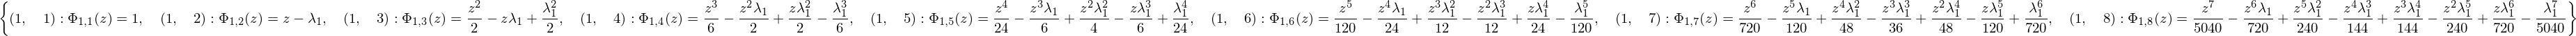

In [78]:
Phi_polynomials = component_polynomials(Phi_poly, eigendata)
Phi_polynomials

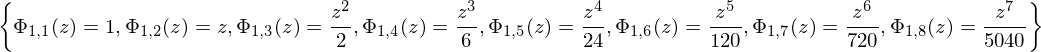

In [79]:
{poly_def.subs(eigenvals) for (i,j), poly_def in Phi_polynomials.items()}

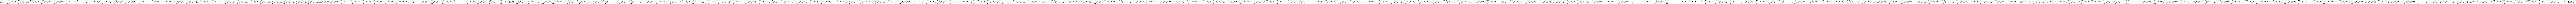

In [87]:
g_expt = g_poly(f_expt, eigendata, Phi_polynomials)
g_expt

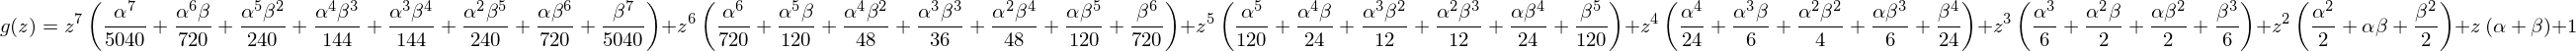

In [88]:
g_expt = g_expt.subs(eigenvals)
g_expt

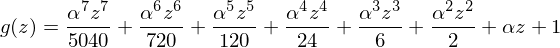

In [89]:
g_expt.subs({beta:0})

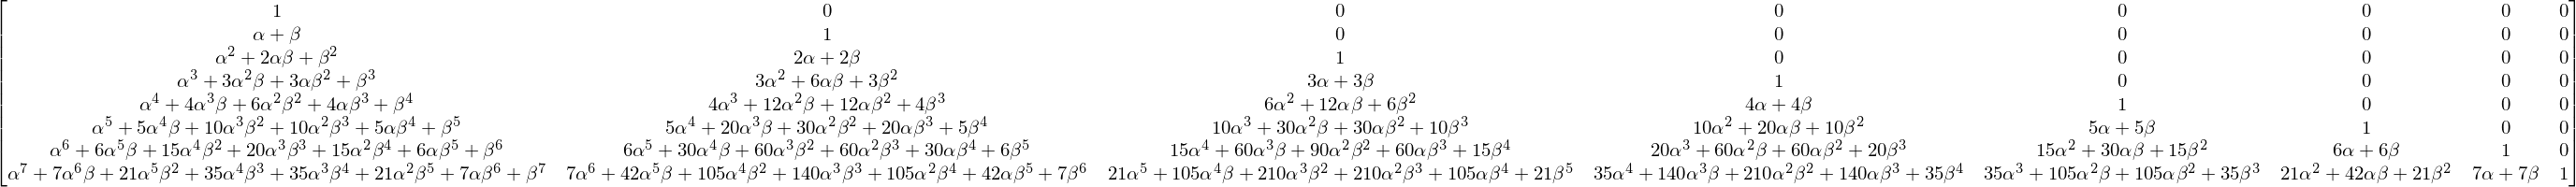

In [82]:
with lift_to_matrix_function(g_expt) as g_expt:
    H_expt = g_expt(H)
H_expt

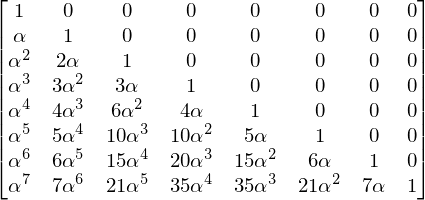

In [83]:
H_expt.subs({beta:0})

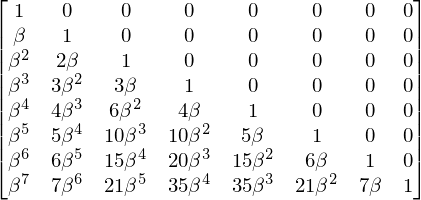

In [84]:
H_expt.subs({alpha:0})

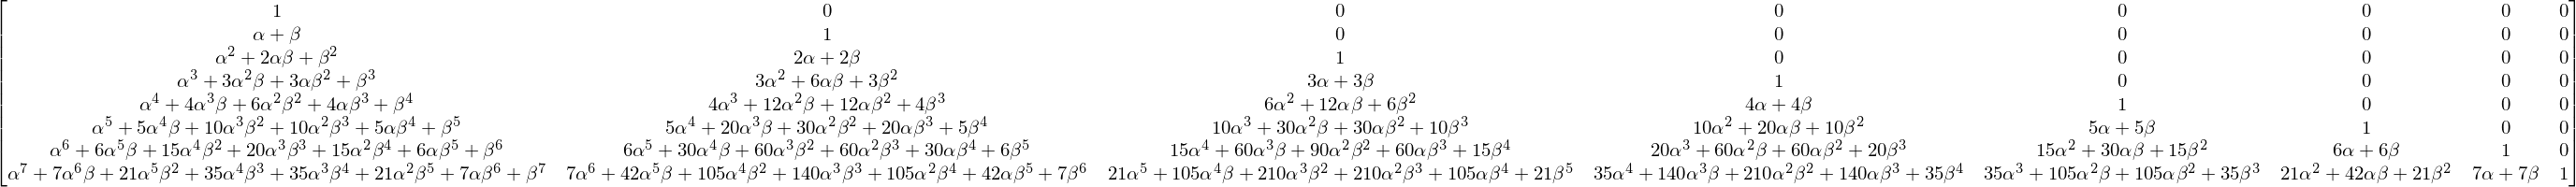

In [85]:
_*__

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.